# Quantum Phase Estimation

In [1]:
def initialize_qubits(given_circuit, measurement_qubits, target_qubit):
    
    given_circuit.h(measurement_qubits)
    given_circuit.x(target_qubit)

In [2]:
import numpy as np
pi = np.pi

In [3]:
def unitary_operator(given_circuit, control_qubit, target_qubit, theta):
    
    given_circuit.cu1(2*pi*theta, control_qubit, target_qubit)

In [4]:
def unitary_operator_exponent(given_circuit, control_qubit, target_qubit, theta, exponent):

    given_circuit.cu1(2*pi*theta*exponent, control_qubit, target_qubit)

In [5]:
from qiskit.circuit.library import QFT

In [6]:
def apply_iqft(given_circuit, measurement_qubits, n):

    given_circuit.append(QFT(n).inverse(), measurement_qubits)

In [7]:
from qiskit import QuantumCircuit

In [8]:
def qpe_program(n, theta):
    
    # Create a quantum circuit on n+1 qubits (n measurement, 1 target)
    qc = QuantumCircuit(n+1, n)
    
    # Initialize the qubits
    initialize_qubits(qc, range(n), n)
    
    # Apply the controlled unitary operators in sequence
    for x in range(n):
        exponent = 2**(n-x-1)
        unitary_operator_exponent(qc, x, n, theta, exponent)
        
    # Apply the inverse quantum Fourier transform
    apply_iqft(qc, range(n), n)
    
    # Measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

n = 3; theta = 0.7
mycircuit = qpe_program(n, theta)
mycircuit.draw(output='text')

/tmp/ipykernel_8017/2589590589.py:3: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  given_circuit.cu1(2*pi*theta*exponent, control_qubit, target_qubit)


┌───┐                                    ┌───────┐┌─┐      
q_0: ┤ H ├─■──────────────────────────────────┤0      ├┤M├──────
     ├───┤ │                                  │       │└╥┘┌─┐   
q_1: ┤ H ├─┼────────────■─────────────────────┤1 IQFT ├─╫─┤M├───
     ├───┤ │            │                     │       │ ║ └╥┘┌─┐
q_2: ┤ H ├─┼────────────┼───────────■─────────┤2      ├─╫──╫─┤M├
     ├───┤ │U1(17.593)  │U1(14π/5)  │U1(7π/5) └───────┘ ║  ║ └╥┘
q_3: ┤ X ├─■────────────■───────────■───────────────────╫──╫──╫─
     └───┘                                              ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════╩══╩══╩═
                                                        0  1  2

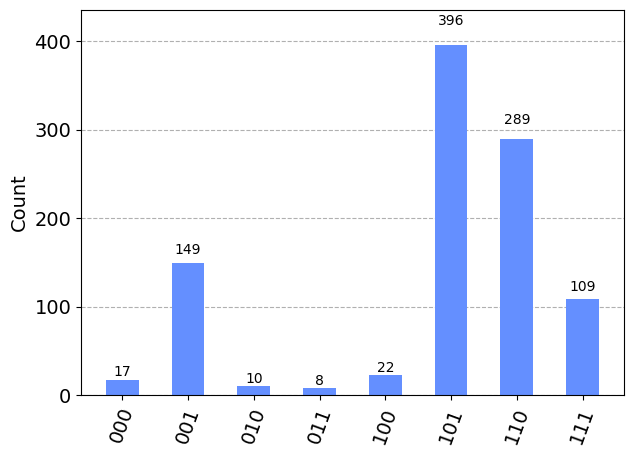

In [9]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(mycircuit, backend=simulator, shots=1000).result().get_counts(mycircuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [10]:
import operator
highest_probability_outcome = max(counts.items(), key=operator.itemgetter(1))[0][::-1]
measured_theta = int(highest_probability_outcome, 2)/2**n
print("Using %d qubits with theta = %.2f, measured_theta = %.2f." % (n, theta, measured_theta))

Using 3 qubits with theta = 0.70, measured_theta = 0.62.


In [11]:
def qpe_program(n, theta):
    
    # Create a quantum circuit on n+1 qubits (n measurement, 1 target)
    qc = QuantumCircuit(n+1, n)
    
    # Initialize the qubits
    initialize_qubits(qc, range(n), n)
    
    # Apply the controlled unitary operators in sequence
    for x in range(n):
        exponent = 2**(n-x-1)
        unitary_operator_exponent(qc, x, n, theta, exponent)
        
    # Apply the inverse quantum Fourier transform
    apply_iqft(qc, range(n), n)
    
    # Measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

n = 4; theta = 0.7
mycircuit = qpe_program(n, theta)
mycircuit.draw(output='text')

/tmp/ipykernel_8017/2589590589.py:3: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  given_circuit.cu1(2*pi*theta*exponent, control_qubit, target_qubit)


┌───┐                                                 ┌───────┐┌─┐      »
q_0: ┤ H ├─■───────────────────────────────────────────────┤0      ├┤M├──────»
     ├───┤ │                                               │       │└╥┘┌─┐   »
q_1: ┤ H ├─┼────────────■──────────────────────────────────┤1      ├─╫─┤M├───»
     ├───┤ │            │                                  │  IQFT │ ║ └╥┘┌─┐»
q_2: ┤ H ├─┼────────────┼────────────■─────────────────────┤2      ├─╫──╫─┤M├»
     ├───┤ │            │            │                     │       │ ║  ║ └╥┘»
q_3: ┤ H ├─┼────────────┼────────────┼───────────■─────────┤3      ├─╫──╫──╫─»
     ├───┤ │U1(35.186)  │U1(17.593)  │U1(14π/5)  │U1(7π/5) └───────┘ ║  ║  ║ »
q_4: ┤ X ├─■────────────■────────────■───────────■───────────────────╫──╫──╫─»
     └───┘                                                           ║  ║  ║ »
c: 4/════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                     0  1  2 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«     ┌─┐
«q_3: ┤M├
«     └╥┘
«q_4: ─╫─
«      ║ 
«c: 4/═╩═
«      3

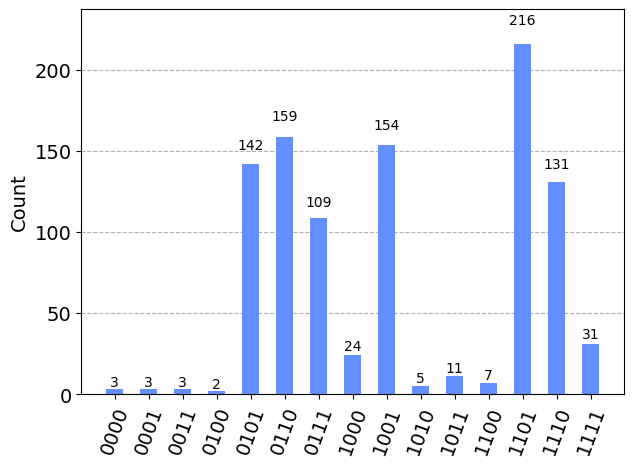

In [12]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(mycircuit, backend=simulator, shots=1000).result().get_counts(mycircuit)
plot_histogram(counts)

In [13]:
highest_probability_outcome = max(counts.items(), key=operator.itemgetter(1))[0][::-1]
measured_theta = int(highest_probability_outcome, 2)/2**n
print("Using %d qubits with theta = %.2f, measured_theta = %.2f." % (n, theta, measured_theta))

Using 4 qubits with theta = 0.70, measured_theta = 0.69.
